<h1>Quiz 1 : Pemahaman ALgoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana Process algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari Algoritma KNN?

<h2> Jawaban: </h2>

1. kNN dilakukan dengan mencari kelompok k objek dalam data training yang paling dekat (mirip) dengan objek pada data baru atau data testing.
2. Sensitif terhadap data pecilan dan Tidak menangani nilai hilang (missing value) secara implisit, Jika terdapat nilai hilang pada satu atau lebih variabel dari suatu instance, perhitungan jarak instance tersebut dengan instance lainnya menjadi tidak terdefinisi. 

<h1>Quiz 2 : Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparaeter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot ke dua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

In [3]:
ks = np.arange(2, 21)
weights = ['distance', 'uniform']

In [8]:
def knn_predict(k, weight):
    model = KNeighborsClassifier(n_neighbors = k, weights = weight)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

In [11]:
list_uniform_score = []
list_distance_score =[]
for k, weight in product(ks, weights):
    score = knn_predict(k = k, weight=weight)
    if weight == 'uniform':
        list_uniform_score.append(score)
    elif weight == 'distance':
        list_distance_score.append(score)


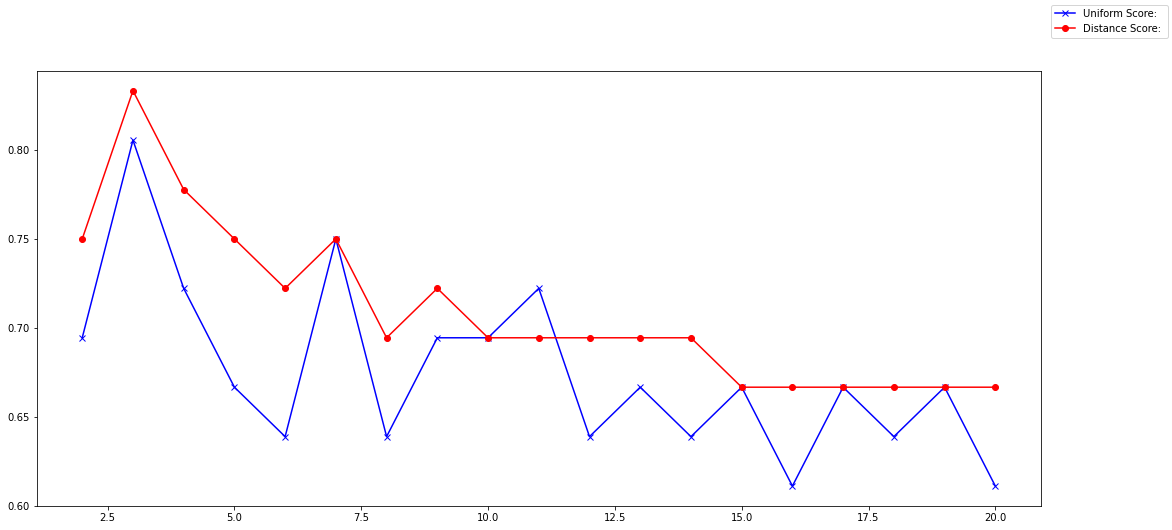

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(ks, list_uniform_score, color='b', label='Uniform Score: ', marker='x')
ax.plot(ks, list_distance_score, color='r', label='Distance Score: ', marker='o')

fig.legend()
plt.show()

Contoh hasil yang di harapkan :

Uniform Scores -> [0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]
 
 distance scores -> [0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

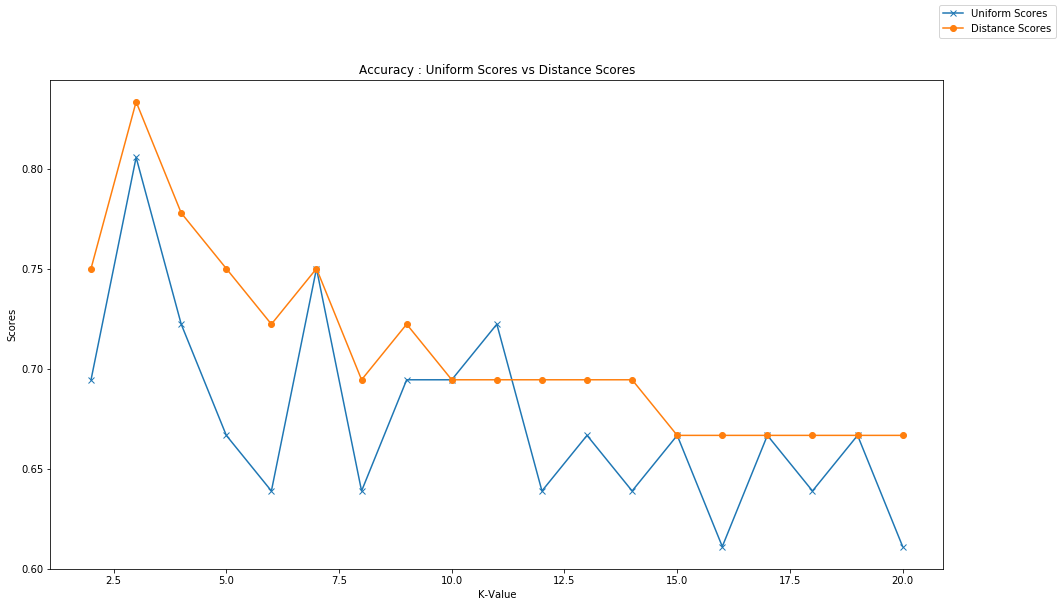

<h1>Quiz 3 : Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [21]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [23]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model_lr.coef_

array([ 1.5, -5. ,  9. , 10. ])

In [25]:
model_lr.intercept_

0.5000000016247412

In [26]:
y = 1.5*X - 5*X + 9*X + 10*X + 5

In [27]:
y

array([[ 69.63841073, 116.65029648,   5.0177281 ,  51.86154876],
       [ 27.74716308,  19.31248219,  33.87033276,  58.56191269],
       [ 66.49895851,  88.51659377,  69.97514973, 111.20902256],
       [ 36.69009871, 141.10820264,   9.24507695, 108.92246408],
       [ 69.68224437,  91.59692341,  26.75997548,  35.70573081],
       [129.11540814, 155.08054424,  53.58074761, 112.31000543],
       [140.84031861, 143.66403284,  18.18185276,  11.0534914 ],
       [ 31.32371503, 141.11208803,  20.24375924,  70.27168188],
       [153.47287717,  87.64061917, 112.24095266,  53.90492281],
       [111.40764379, 134.36697914,   7.83468299, 121.27236882],
       [158.27346878, 120.96567643,  48.46881877, 127.33829591],
       [ 21.00003102,  74.42349656, 145.83230298,  50.510193  ],
       [ 49.60517748,  25.15442868,   8.00187847, 110.21950761],
       [ 37.80235798,  46.1597322 ,  81.19383969,  13.27119449],
       [ 93.98822885,  27.74292911,  96.34235822, 113.4625458 ],
       [ 20.86183647,  69